In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import pandas_datareader.data as pdr
import yfinance
from cycler import cycler

yfinance.pdr_override()


In [2]:
data_inicial = datetime.now()- timedelta(days=360)
data_final = datetime.now()

df_ibov = pdr.get_data_yahoo("^BVSP",data_inicial,data_final)['Adj Close']

display(df_ibov)

[*********************100%%**********************]  1 of 1 completed


Date
2023-05-15    109029.0
2023-05-16    108194.0
2023-05-17    109460.0
2023-05-18    110108.0
2023-05-19    110745.0
                ...   
2024-04-29    127352.0
2024-04-30    125924.0
2024-05-02    127122.0
2024-05-03    128509.0
2024-05-06    128466.0
Name: Adj Close, Length: 244, dtype: float64

In [3]:
retorno_ibov = df_ibov.iloc[-1] / df_ibov.iloc[0]-1

print(f" o retorno foi de :{retorno_ibov:.1%}")

 o retorno foi de :17.8%


In [4]:
#Alterando a paleta de cores

cores = plt.get_cmap("Dark2").colors
ciclo_cores = cycler('color', cores)
plt.rc('axes',prop_cycle=ciclo_cores)

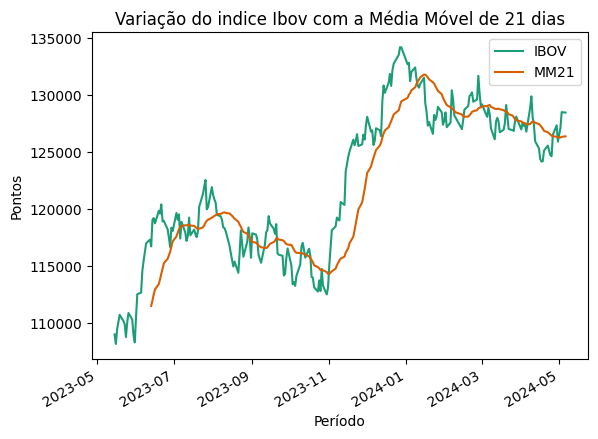

In [5]:
#media movel

df_ibov.plot(label="IBOV")
media_movel = df_ibov.rolling(21).mean()
media_movel.plot(label="MM21")
plt.title("Variação do indice Ibov com a Média Móvel de 21 dias")
plt.xlabel("Período")
plt.ylabel("Pontos")
plt.legend()
plt.show()